# Setup

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]

# Get Data

In [3]:
# AWG
ds_AWG = xr.open_dataset('../data/awg_processed.nc')
ds_AWG

<xarray.Dataset>
Dimensions:                      (coastal_loc: 146472, coastal_pos: 44325, lonmin,lonmax,latmin,latmax: 4, pres: 201, time: 146472)
Coordinates:
    prof                         (time) int32 ...
  * time                         (time) datetime64[ns] 1958-06-01 ... 2020-02-07
  * pres                         (pres) int32 0 5 10 15 20 ... 985 990 995 1000
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 146470 146471
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 44322 44323 44324
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float32 ...
    psal                         (time, pres) float32 ...
    doxy                         (time, pres) float32 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    type                         (time) int32 ...
    temp_anom                    (time, pres) fl

# Subset

In [18]:
#----------------- Arabian Sea ---------------------#

ind_AS = (ds_AWG.lon < bounds_AS[1]) & (ds_AWG.lon > bounds_AS[0]) & (ds_AWG.lat < bounds_AS[3]) & (ds_AWG.lat > bounds_AS[2]) 

#subset gridded data
temp_AS = ds_AWG.temp_50_200[ind_AS]
doxy_AS = ds_AWG.doxy_50_200[ind_AS]
# nitrate_AS = ds_AWG.nitrate_50_200[ind_AS]
lat_AS = ds_AWG.lat[ind_AS]
lon_AS = ds_AWG.lon[ind_AS]
time_AS = ds_AWG.time[ind_AS]
mon_AS = time_AS.dt.month
    
# convert to coastal
mask_AS = mask_coast(np.array(lon_AS),np.array(lat_AS),np.array(ds_AWG.coastal_mask_bounds))
temp_AS = temp_AS[mask_AS]
doxy_AS = doxy_AS[mask_AS]
# nitrate_AS = nitrate_AS[mask_AS]
lat_AS = lat_AS[mask_AS]
lon_AS = lon_AS[mask_AS]
time_AS = time_AS[mask_AS]
mon_AS = mon_AS[mask_AS]

#---------------- Western Bay of Bengal --------------------#

ind_wBoB = (ds_AWG.lon < bounds_wBoB[1]) & (ds_AWG.lon > bounds_wBoB[0]) & (ds_AWG.lat < bounds_wBoB[3]) & (ds_AWG.lat > bounds_wBoB[2]) 

#subset gridded data
temp_wBoB = ds_AWG.temp_50_200[ind_wBoB]
doxy_wBoB = ds_AWG.doxy_50_200[ind_wBoB]
# nitrate_wBoB = ds_AWG.nitrate_50_200[ind_wBoB]
lat_wBoB = ds_AWG.lat[ind_wBoB]
lon_wBoB = ds_AWG.lon[ind_wBoB]
time_wBoB = ds_AWG.time[ind_wBoB]
mon_wBoB = time_wBoB.dt.month
    
# convert to coastal
mask_wBoB = mask_coast(np.array(lon_wBoB),np.array(lat_wBoB),np.array(ds_AWG.coastal_mask_bounds))
temp_wBoB = temp_wBoB[mask_wBoB]
doxy_wBoB = doxy_wBoB[mask_wBoB]
# nitrate_wBoB = nitrate_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
lon_wBoB = lon_wBoB[mask_wBoB]
time_wBoB = time_wBoB[mask_wBoB]
mon_wBoB = mon_wBoB[mask_wBoB]

#---------------- Bay of Bengal --------------------#

ind_BoB = (ds_AWG.lon < bounds_BoB[1]) & (ds_AWG.lon > bounds_BoB[0]) & (ds_AWG.lat < bounds_BoB[3]) & (ds_AWG.lat > bounds_BoB[2]) 

#subset gridded data
temp_BoB = ds_AWG.temp_50_200[ind_BoB]
doxy_BoB = ds_AWG.doxy_50_200[ind_BoB]
# nitrate_BoB = ds_AWG.nitrate_50_200[ind_BoB]
lat_BoB = ds_AWG.lat[ind_BoB]
lon_BoB = ds_AWG.lon[ind_BoB]
time_BoB = ds_AWG.time[ind_BoB]
mon_BoB = time_BoB.dt.month

# convert to coastal
mask_BoB = mask_coast(np.array(lon_BoB),np.array(lat_BoB),np.array(ds_AWG.coastal_mask_bounds))
temp_BoB = temp_BoB[mask_BoB]
doxy_BoB = doxy_BoB[mask_BoB]
# nitrate_BoB = nitrate_BoB[mask_BoB]
lat_BoB = lat_BoB[mask_BoB]
lon_BoB = lon_BoB[mask_BoB]
time_BoB = time_BoB[mask_BoB]
mon_BoB = mon_BoB[mask_BoB]


Text(0.5, 1.0, 'Profile Locations')

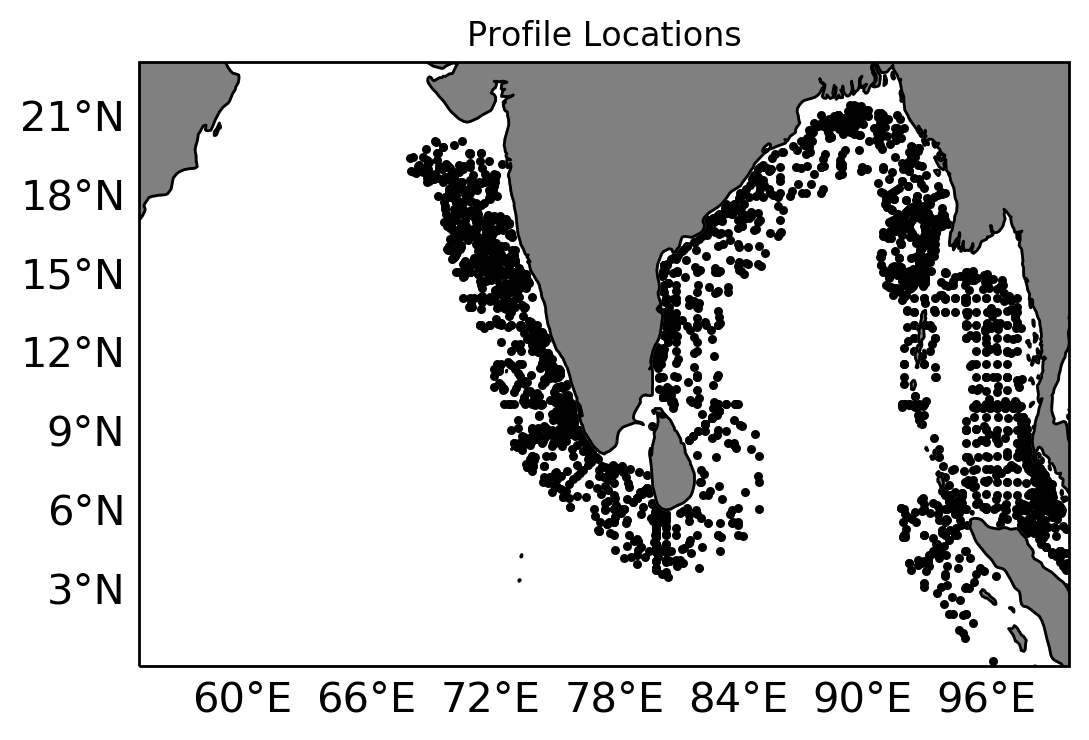

In [19]:
# make a scatter plot with rectangles to outline different locations...don't need in the figure necessairly.

    
cmin = -0.2
cmax = 0.2
levels = np.linspace(cmin, cmax, 10)

# Start figure
fig = plt.figure(figsize=(6, 4), dpi = 200)
ax = plt.axes(projection=ccrs.PlateCarree())
add_land(ax, [55,100,0,23])
p =plt.scatter(lon_AS[~np.isnan(doxy_AS)],lat_AS[~np.isnan(doxy_AS)],
            s = 20,c='k',marker = '.')
p =plt.scatter(lon_wBoB[~np.isnan(doxy_wBoB)],lat_wBoB[~np.isnan(doxy_wBoB)],
            s = 20,c='k',marker = '.')
p =plt.scatter(lon_BoB[~np.isnan(doxy_BoB)],lat_BoB[~np.isnan(doxy_BoB)],
            s = 20,c='k',marker = '.')
plt.title('Profile Locations')

In [20]:
# group AS into IOD years

# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')
ds_DMI

posIODyears = list(np.array(ds_DMI.pos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) 

# groupd into IOD years

IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

In [21]:
# Arabian Sea

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_AS,posIODlat_AS,posIODlon_AS,posIODtime_AS,posIODmon_AS,posIODseas_AS = IOD_year_group(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_AS,negIODlat_AS,negIODlon_AS,negIODtime_AS,negIODmon_AS,negIODseas_AS= IOD_year_group(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_AS,neuIODlat_AS,neuIODlon_AS,neuIODtime_AS,neuIODmon_AS,neuIODseas_AS = IOD_year_group(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,neuIODyears)



In [22]:
# wBoB

# 10-200

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_wBoB,posIODlat_wBoB,posIODlon_wBoB,posIODtime_wBoB,posIODmon_wBoB,posIODseas_wBoB = IOD_year_group(doxy_wBoB,
                                             lat_wBoB,lon_wBoB,time_wBoB,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_wBoB,negIODlat_wBoB,negIODlon_wBoB,negIODtime_wBoB,negIODmon_wBoB,negIODseas_wBoB = IOD_year_group(doxy_wBoB,
                                             lat_wBoB,lon_wBoB,time_wBoB,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_wBoB,neuIODlat_wBoB,neuIODlon_wBoB,neuIODtime_wBoB,neuIODmon_wBoB,neuIODseas_wBoB = IOD_year_group(doxy_wBoB,
                                             lat_wBoB,lon_wBoB,time_wBoB,
                                             IODyear_begin,IODyear_end,neuIODyears)




In [23]:
# eBoB

# 10-200

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_BoB,posIODlat_BoB,posIODlon_BoB,posIODtime_BoB,posIODmon_BoB,posIODseas_BoB = IOD_year_group(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_BoB,negIODlat_BoB,negIODlon_BoB,negIODtime_BoB,negIODmon_BoB,negIODseas_BoB = IOD_year_group(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_BoB,neuIODlat_BoB,neuIODlon_BoB,neuIODtime_BoB,neuIODmon_BoB,neuIODseas_BoB = IOD_year_group(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,neuIODyears)



# Histograms and K-S test

Ks Test Sources

http://www.stats.ox.ac.uk/~massa/Lecture%2013.pdf

https://stackoverflow.com/questions/10884668/two-sample-kolmogorov-smirnov-test-in-python-scipy

https://math.stackexchange.com/questions/1251401/kolmogorov-smirnov-two-sample-test

http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm

not exactly python but helpul

https://www.graphpad.com/guides/prism/8/statistics/interpreting_results_kolmogorov-smirnov_test.htm



0  # data for positive IOD years:  322
0  # data for negative IOD years:  294
0  # data for all years:  1162
1  # data for positive IOD years:  85
1  # data for negative IOD years:  150
1  # data for all years:  562
2  # data for positive IOD years:  382
2  # data for negative IOD years:  514
2  # data for all years:  1360


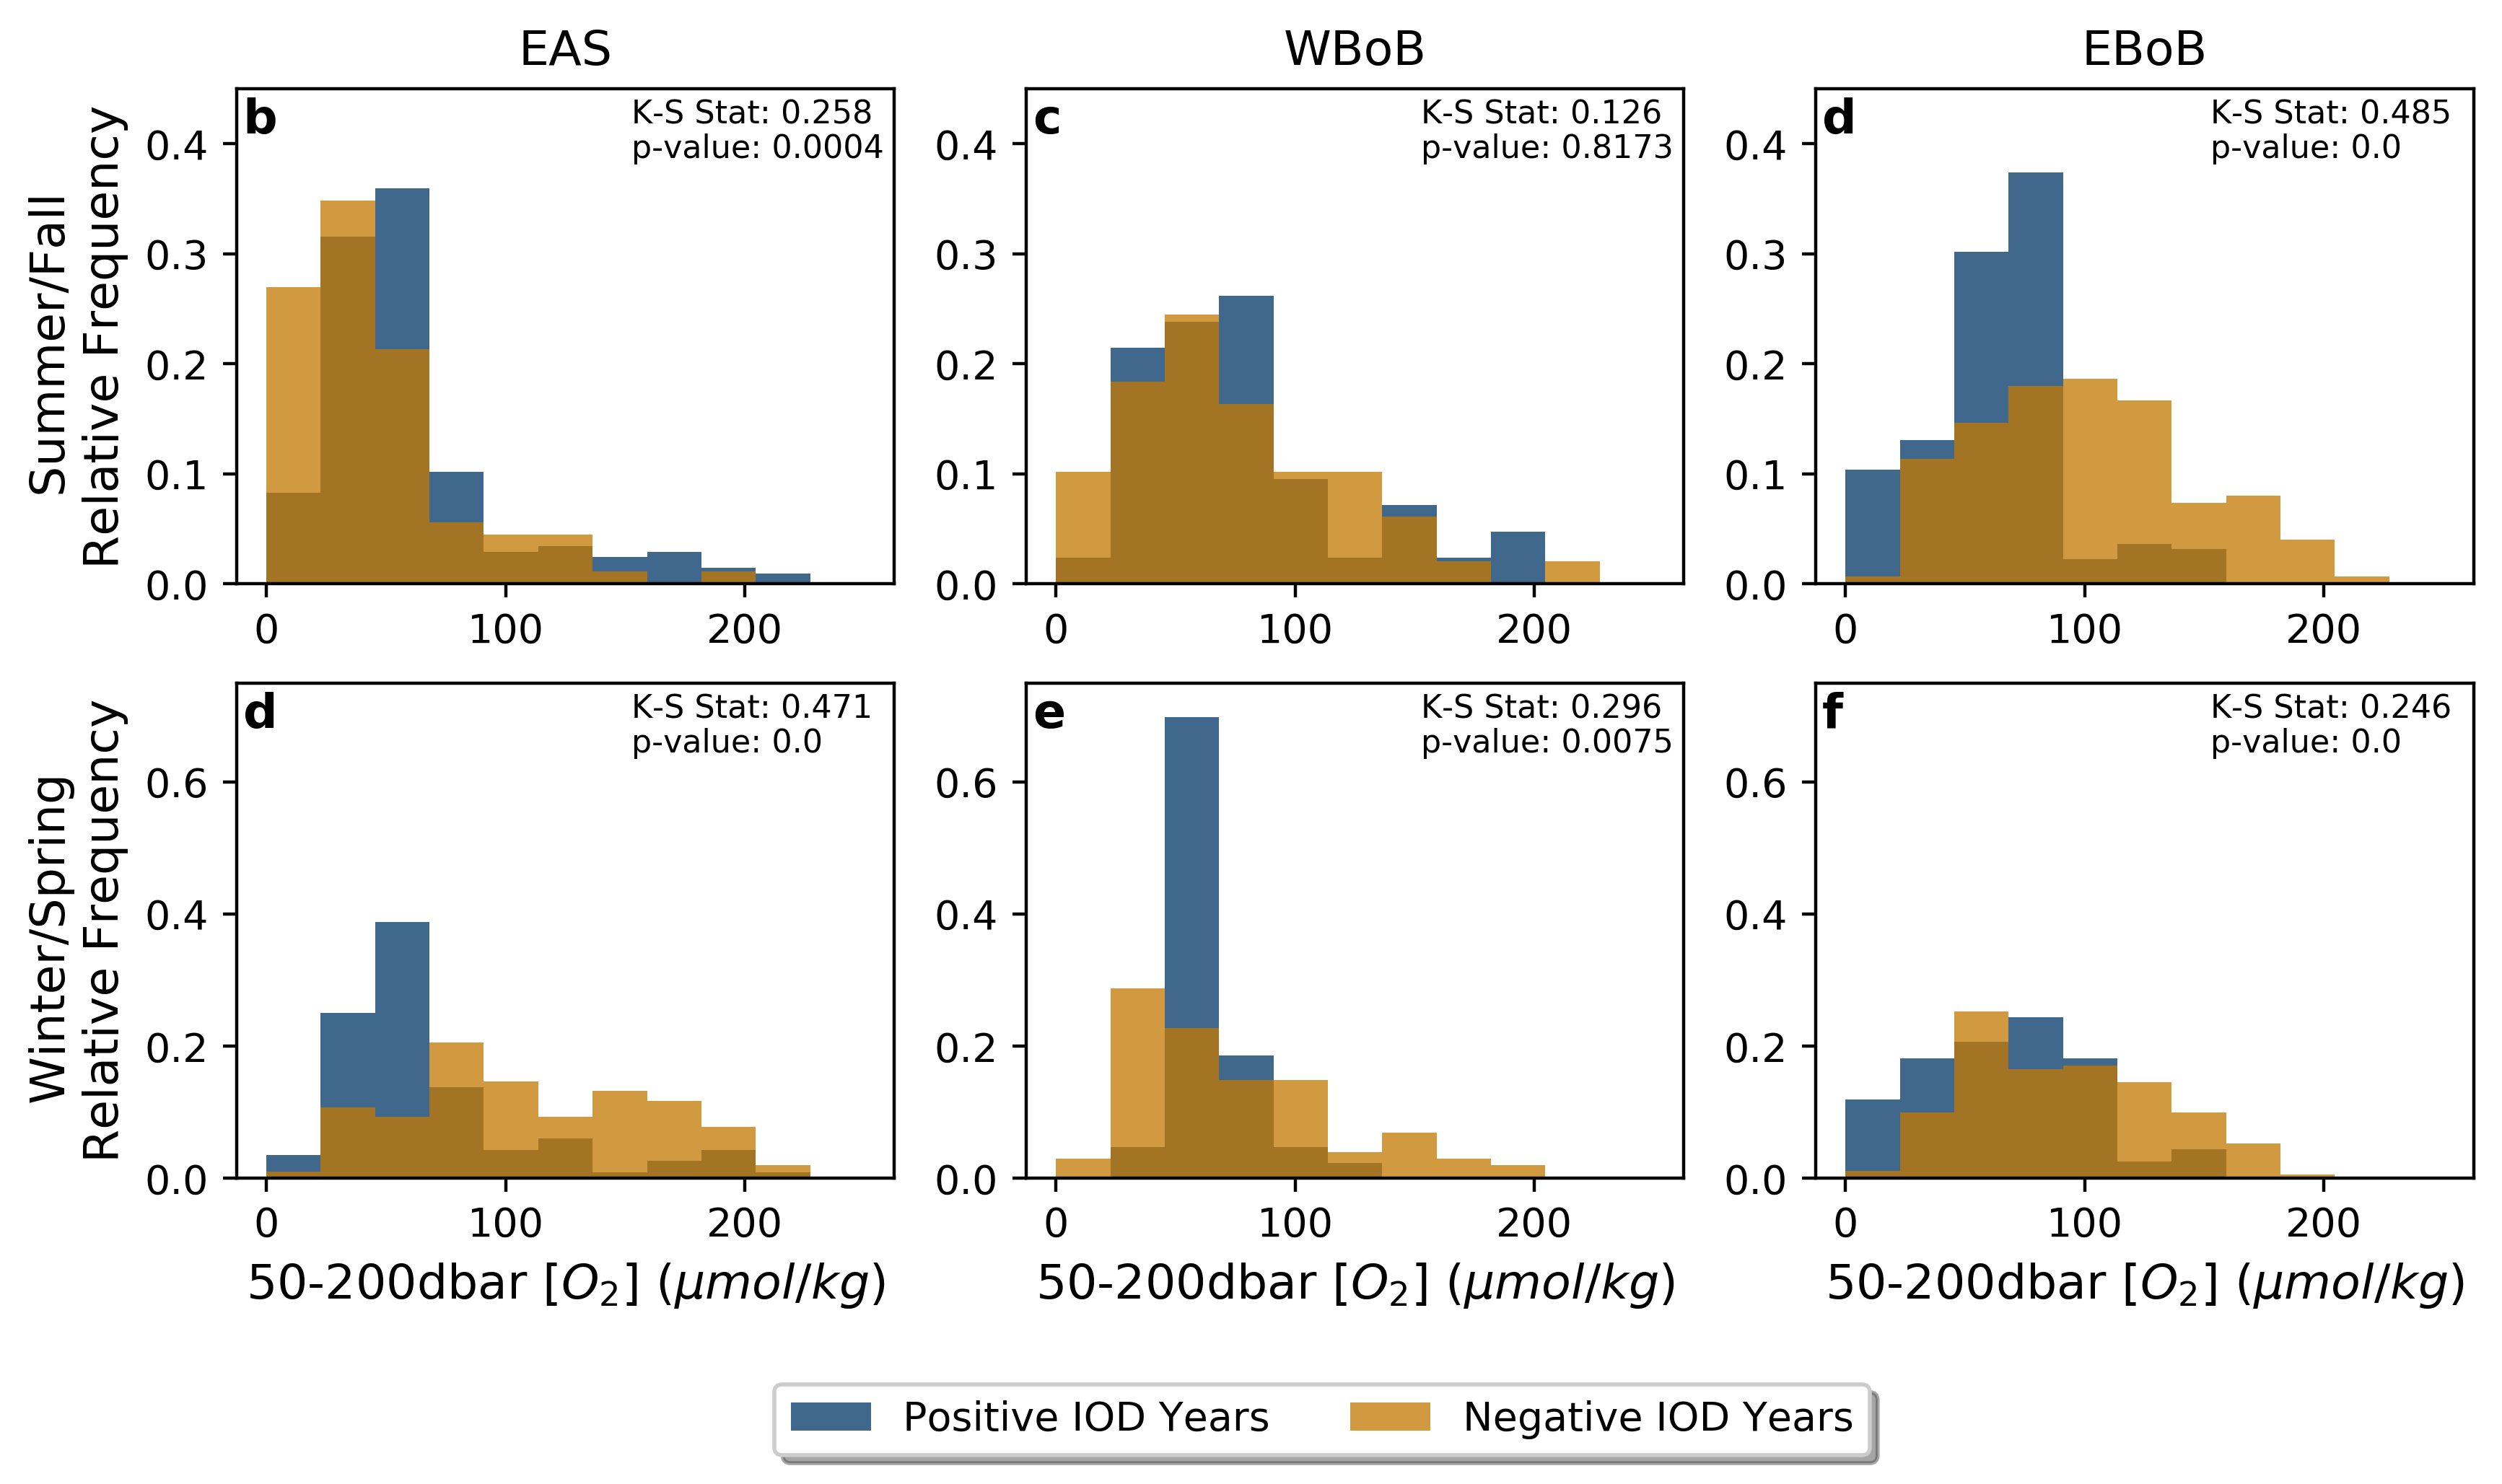

In [42]:
# Make Histograms 
binedges = np.linspace(0,250,12)
names = ['Positive IOD Years','Negative IOD Years','All Observed Years']
# title = ['Eastern Arabian Sea', 'Western Bay of Bengal','Eastern Bay of Bengal']
title = ['EAS', 'WBoB','EBoB']
# colors = ['teal','orange','purple']
colors = ['#003466','#C47900']
letters = ['a','b','c','d','e','f']

fig = plt.figure(figsize=(10, 5), dpi=400)

params = {'legend.fontsize': 10,
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':10,
         'ytick.labelsize':10}

pylab.rcParams.update(params)

#########################

data_AS = [posIODdata_AS,negIODdata_AS,doxy_AS]
data_wBoB = [posIODdata_wBoB,negIODdata_wBoB,doxy_wBoB]
data_BoB = [posIODdata_BoB,negIODdata_BoB,doxy_BoB]
time_data_AS = [posIODmon_AS,negIODmon_AS,mon_AS]
time_data_wBoB = [posIODmon_wBoB,negIODmon_wBoB,mon_wBoB]
time_data_BoB = [posIODmon_BoB,negIODmon_BoB,mon_BoB]

cnt = 1
for pp in range(3):

    if pp==0:
        pdata = data_AS[0]
        ndata = data_AS[1]
        alldata = data_AS[2]
        
        ptdata = time_data_AS[0]
        ntdata = time_data_AS[1]
        alltdata = time_data_AS[2]
        
    elif pp==1:
        pdata = data_wBoB[0]
        ndata = data_wBoB[1]
        alldata = data_wBoB[2]
        
        ptdata = time_data_wBoB[0]
        ntdata = time_data_wBoB[1]
        alltdata = time_data_wBoB[2]
        
    else:
        pdata = data_BoB[0]
        ndata = data_BoB[1]
        alldata = data_BoB[2]
        
        ptdata = time_data_BoB[0]
        ntdata = time_data_BoB[1]
        alltdata = time_data_BoB[2]

    # O2
    x1 = pdata[~np.isnan(pdata)]
    x2 = ndata[~np.isnan(ndata)]
    x3 = alldata[~np.isnan(alldata)]

    x1t = ptdata[~np.isnan(pdata)]
    x2t = ntdata[~np.isnan(ndata)]
    x3t = alltdata[~np.isnan(alldata)]
    
    print(pp, ' # data for positive IOD years: ',len(x1))
    print(pp, ' # data for negative IOD years: ',len(x2))
    print(pp, ' # data for all years: ',len(x3))

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    

    # ks test

    pos_neg_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
    pos_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
    neg_all_ks_sf = stats.ks_2samp(x2_sf,x3_sf)

    pos_neg_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
    pos_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
    neg_all_ks_ws = stats.ks_2samp(x2_ws,x3_ws)

    # weights for relative frequency
    
    weights_sf = [np.zeros_like(x1_sf) + 1./len(x1_sf),
              np.zeros_like(x2_sf) + 1./len(x2_sf),
              np.zeros_like(x3_sf) + 1./len(x3_sf)]

    weights_ws = [np.zeros_like(x1_ws) + 1./len(x1_ws),
              np.zeros_like(x2_ws) + 1./len(x2_ws),
              np.zeros_like(x3_ws) + 1./len(x3_ws)]

    #subplot summer fall
    ax = fig.add_subplot(2,3,cnt)
    plt.hist(x1_sf,bins = binedges, weights=weights_sf[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_sf,bins = binedges, weights=weights_sf[1],
                 alpha=0.75,color = colors[1], label=names[1])
    ax.set_ylim([0,0.45])
    ax.set_title(title[pp])
    
    if cnt == 1:
        ax.set_ylabel('Summer/Fall \nRelative Frequency')
#     if cnt == 3:
#         ax2 = ax.twinx()
#         ax2.set_yticks([])
#         ax2.set_yticklabels([])
#         ax2.set_ylabel('Summer/Fall')
        
    add_letter(ax, letters[cnt], x = 0.01,y=0.91)
    add_text(ax, 'K-S Stat: ' + str(np.round(pos_neg_ks_sf[0],3)), x = 0.6,y=0.93, fontsize = 8)
    add_text(ax, 'p-value: ' + str(np.round(pos_neg_ks_sf[1],4)), x = 0.6,y=0.86, fontsize = 8)
    
    # subplot winter spring
    ax = fig.add_subplot(2,3,cnt + 3)
    plt.hist(x1_ws,bins = binedges, weights=weights_ws[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_ws,bins = binedges, weights=weights_ws[1],
                 alpha=0.75,color = colors[1], label=names[1])
    ax.set_ylim([0,0.75])
    ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
    if cnt == 1:
        ax.set_ylabel('Winter/Spring \nRelative Frequency')
#     if cnt == 3:
#         ax2 = ax.twinx()
#         ax2.set_yticks([])
#         ax2.set_yticklabels([])
#         ax2.set_ylabel('Winter/Spring')
        
    add_letter(ax, letters[cnt+2], x = 0.01,y=0.91)
    add_text(ax, 'K-S Stat: ' + str(np.round(pos_neg_ks_ws[0],3)), x = 0.6,y=0.93, fontsize = 8)
    add_text(ax, 'p-value: ' + str(np.round(pos_neg_ks_ws[1],4)), x = 0.6,y=0.86, fontsize = 8)
    
    cnt += 1

ax.legend(loc='lower center', bbox_to_anchor=(-.75, -.6),
          ncol=2, fancybox=True, shadow=True)